In [62]:
import pickle
from parameters import saved_models
from allen_simulation import load_model_config_stimulus
import numpy as np

specimen_ids = [474637203]  # , 512322162]
model_types = [
    "LIF_model",
    "LIFR_model",
    "LIFASC_model",
    "LIFRASC_model",
    "LIFRASCAT_model",
]

specimen_id = specimen_ids[0]
model_type = model_types[1]


# Load previously saved results
save_name = (
    "pkl_data/GeNN_" + str(specimen_id) + "_{}.pkl".format(model_type)
)
with open(save_name, "rb") as f:
    data_dict, saved_model = pickle.load(f)

t = saved_model["time"]

var_name_dict = {"V": "voltage", "T": "threshold", "ASC": "AScurrents"}
var_scale = {"V": 1e3, "T": 1e3, "ASC": 1e9}
var_unit = {"V": "mV", "T": "mV", "ASC": "nA"}


# Compare voltage differences
v = "T"

if v != "ASC":
    Allen = (
        saved_model[var_name_dict[v]].astype("float64") * var_scale[v]
    )
else:
    Allen = (
        saved_model[var_name_dict[v]][:].astype("float64")
        * var_scale[v]
    )
GeNN = np.squeeze(data_dict[v])

diff = GeNN-Allen

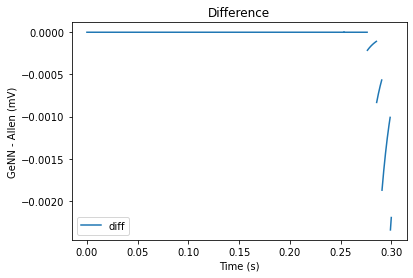

In [63]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1)

# Voltage difference
axs.plot(t, diff, label="diff")
axs.set_xlabel("Time (s)")
axs.set_ylabel("{0} - {1} ({2})".format("GeNN", "Allen", "mV"))
axs.set_title("Threshold Difference")
axs.legend()
plt.show()


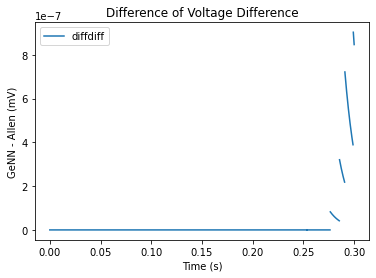

In [64]:
# Plot difference of differences (detects sudden jumps in the difference between GeNN and Allen)

diffdiff = np.diff(diff)

# Difference of Voltage difference
fig, axs = plt.subplots(1, 1)
axs.plot(t[:-1], diffdiff, label="diffdiff")
axs.set_xlabel("Time (s)")
axs.set_ylabel("{0} - {1} ({2})".format("GeNN", "Allen", "mV"))
axs.set_title("Difference of Voltage Difference")
axs.legend()
plt.show()

Largest jump is 7e-15, which is evidence that the deviation between GeNN and Allen are due to accumulation of small floating point arithmetic errors.

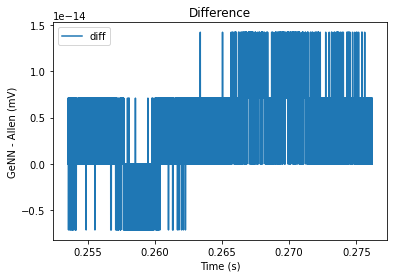

In [65]:
# Plot first interval after a spike
start = saved_model['spike_time_steps'][0] 
stop = saved_model['spike_time_steps'][1] 

interval_diff = GeNN[start:stop] - Allen[start:stop]

# Voltage difference
fig, axs = plt.subplots(1, 1)
axs.plot(t[start:stop], interval_diff, label="diff")
axs.set_xlabel("Time (s)")
axs.set_ylabel("{0} - {1} ({2})".format("GeNN", "Allen", "mV"))
axs.set_title("Difference")
axs.legend()
plt.show()


In [66]:
saved_model['spike_time_steps']

array([50650, 55235, 57060, 58114, 59774])

In [67]:
for i in range(start,stop): print(i, GeNN[i], Allen[i])

50650 51.53067462115035 nan
50651 51.53067462115035 nan
50652 51.53067462115035 nan
50653 51.53067462115035 nan
50654 51.53067462115035 nan
50655 51.53067462115035 nan
50656 51.53067462115035 nan
50657 51.53067462115035 nan
50658 51.53067462115035 nan
50659 51.53067462115035 nan
50660 51.53067462115035 nan
50661 51.53067462115035 nan
50662 51.53067462115035 nan
50663 51.53067462115035 nan
50664 51.53067462115035 nan
50665 51.53067462115035 nan
50666 51.53067462115035 nan
50667 51.53067462115035 nan
50668 51.53067462115035 nan
50669 51.53067462115035 nan
50670 51.53067462115035 nan
50671 51.53067462115035 nan
50672 51.53067462115035 nan
50673 51.53067462115035 nan
50674 51.53067462115035 nan
50675 51.53067462115035 nan
50676 51.53067462115035 nan
50677 51.53067462115035 nan
50678 51.53067462115035 nan
50679 51.53067462115035 nan
50680 51.53067462115035 nan
50681 51.53067462115035 nan
50682 51.53067462115035 nan
50683 51.53067462115035 nan
50684 51.53067462115035 nan
50685 51.53067462115